In [12]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv(r"C:\Users\Suyash Tambe\Desktop\Supervised ML\Class work\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


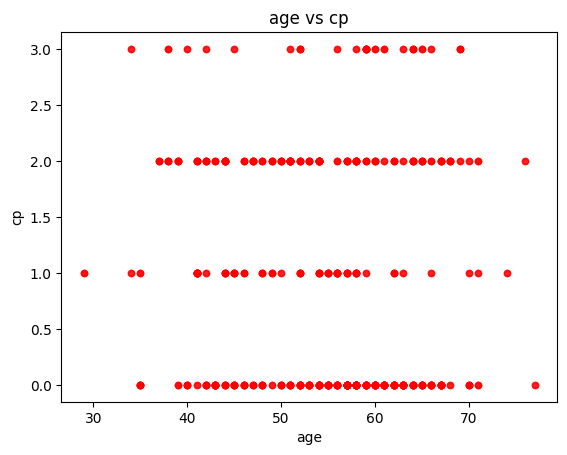

In [6]:
df.plot(kind = 'scatter',x='age',y='cp',alpha = 0.5 , color = 'red')#cp = chestpain
plt.xlabel('age')
plt.ylabel('cp')
plt.title('age vs cp')
plt.show()

In [7]:
x=df.drop('target',axis=1)
y= df['target']


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [15]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [16]:
ml = svm.SVC()


param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1,cv = 15)

grid.fit(x_train, y_train)
grid_predictions = grid.predict(x_test)

Fitting 15 folds for each of 25 candidates, totalling 375 fits


In [17]:
y_pred = grid.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9911504424778761

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       171
           1       1.00      0.98      0.99       168

    accuracy                           0.99       339
   macro avg       0.99      0.99      0.99       339
weighted avg       0.99      0.99      0.99       339


Confusion Matrix:
 [[171   0]
 [  3 165]]


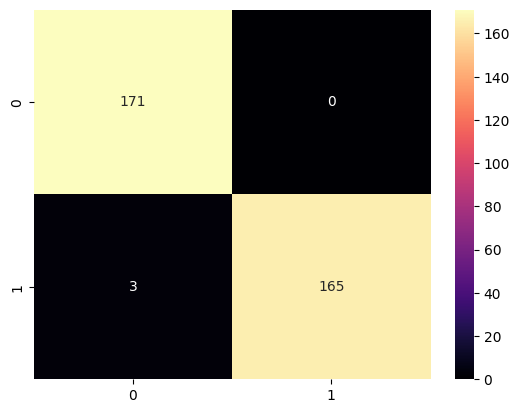

In [23]:
cm_display = confusion_matrix(y_test, grid_predictions)
cm_display = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_display, annot=True, cmap='magma', fmt='g')
plt.show()
#